<a href="https://colab.research.google.com/github/mambabhi/Voice-gender-classification/blob/main/audio_gender_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gdown

In [ ]:
import gdown

In [ ]:
# https://drive.google.com/file/d/1GOetOrCCHbNY6mpTaPIf8r2zCe0ijy8H/view?usp=sharing

file_id = "1GOetOrCCHbNY6mpTaPIf8r2zCe0ijy8H"
url = f"https://drive.google.com/uc?id={file_id}"
output = "cv-corpus-22.0-delta-2025-06-20-en.tar.gz"
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1GOetOrCCHbNY6mpTaPIf8r2zCe0ijy8H
From (redirected): https://drive.google.com/uc?id=1GOetOrCCHbNY6mpTaPIf8r2zCe0ijy8H&confirm=t&uuid=9a14c2a1-95b3-4871-a426-f46b2ac8d894
To: /content/cv-corpus-22.0-delta-2025-06-20-en.tar.gz
100%|██████████| 1.12G/1.12G [00:13<00:00, 81.2MB/s]


'cv-corpus-22.0-delta-2025-06-20-en.tar.gz'

In [ ]:
!mkdir -p /content/common_voice
!tar -xvzf cv-corpus-22.0-delta-2025-06-20-en.tar.gz -C /content/common_voice

Streaming output truncated to the last 5000 lines.
cv-corpus-22.0-delta-2025-06-20/en/clips/common_voice_en_43228946.mp3
cv-corpus-22.0-delta-2025-06-20/en/clips/common_voice_en_43228947.mp3
cv-corpus-22.0-delta-2025-06-20/en/clips/common_voice_en_43228948.mp3
cv-corpus-22.0-delta-2025-06-20/en/clips/common_voice_en_43228949.mp3
cv-corpus-22.0-delta-2025-06-20/en/clips/common_voice_en_43228955.mp3
cv-corpus-22.0-delta-2025-06-20/en/clips/common_voice_en_43228957.mp3
cv-corpus-22.0-delta-2025-06-20/en/clips/common_voice_en_43228959.mp3
cv-corpus-22.0-delta-2025-06-20/en/clips/common_voice_en_43228960.mp3
cv-corpus-22.0-delta-2025-06-20/en/clips/common_voice_en_43228962.mp3
cv-corpus-22.0-delta-2025-06-20/en/clips/common_voice_en_43228970.mp3
cv-corpus-22.0-delta-2025-06-20/en/clips/common_voice_en_43228971.mp3
cv-corpus-22.0-delta-2025-06-20/en/clips/common_voice_en_43228972.mp3
cv-corpus-22.0-delta-2025-06-20/en/clips/common_voice_en_43228973.mp3
cv-corpus-22.0-delta-2025-06-20/en/clip

# Task
Classify the voice in the audio file "/content/Itichalala.mp3" as male or female using an ML classifier.

## Install necessary libraries

### Subtask:
Install libraries for audio processing and machine learning.


**Reasoning**:
Install the necessary libraries for audio processing and machine learning.



In [ ]:
!pip install tensorflow
!pip install scikit-learn
!pip install librosa
!pip install pyworld
!pip install praat-parselmouth
!pip install matplotlib seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.0/261.0 kB 8.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyworld: filename=pyworld-0.3.5-cp312-cp312-linux_x86_64.whl size=941022 sha256=b5dac7ebddea321a0c800c475e4f1eed16bb4124a6f1a4db38547fa9d6011e05
  Stored in directory: /root/.cache/pip/wheels/be/ac/58/c6a1791ec6d17f3a99b6ccdec92b472f560cb5c564b83dd77e
Successfully built pyworld
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.7/10.7 MB 101.0 MB/s eta 0:00:00


## Load and process the metadata & audio file

### Subtask:
#### Load the metadata of the clips
#### Load the mp3 file and potentially resample it to a suitable rate for analysis.


**Reasoning**: Load the metadata of the clips

In [ ]:
import pandas as pd
import os

DATA_PATH = "/content/common_voice/cv-corpus-22.0-delta-2025-06-20/en"
CLIPS_PATH = os.path.join(DATA_PATH, "clips")

In [ ]:
# Load validated metadata
metadata  = pd.read_csv(os.path.join(DATA_PATH, "other.tsv"), sep="\t")

In [ ]:
metadata = metadata[(metadata['gender'] == 'male_masculine') | (metadata['gender'] == 'female_feminine')]

In [ ]:
sample_metadata = metadata.sample(n=4000, random_state=42)

In [ ]:
gender = metadata['gender']

In [ ]:
metadata = metadata.dropna(subset=['gender'])  # keep only labeled clips
print(metadata.head())

                                             client_id  \
111  befbc9d0070ca900295c8573286aba46581790fcfdbbbd...   
112  befbc9d0070ca900295c8573286aba46581790fcfdbbbd...   
113  befbc9d0070ca900295c8573286aba46581790fcfdbbbd...   
114  befbc9d0070ca900295c8573286aba46581790fcfdbbbd...   
115  befbc9d0070ca900295c8573286aba46581790fcfdbbbd...   

                             path  \
111  common_voice_en_42706133.mp3   
112  common_voice_en_42706134.mp3   
113  common_voice_en_42706135.mp3   
114  common_voice_en_42706136.mp3   
115  common_voice_en_42706137.mp3   

                                           sentence_id  \
111  f881280da9af36c156a78a12ba658379f83efb348c9bcd...   
112  f894a46f5849778a4568c6f7bdafe31e4e4914695d2a4f...   
113  f88fe3edd54022849087ed6be49d0e67ea93b336d73b57...   
114  f89c965a0a1370a4d1b7d190d49a9cfbe33a3c283f7697...   
115  f88ee2b03d3a8a56c0993ef6138f76138ab1f0678b98a3...   

                                              sentence sentence_domain  \
111  

In [ ]:
import numpy as np
import librosa
import parselmouth
import pyworld as pw
from tqdm import tqdm
import torch
import torchaudio

In [ ]:
#Test the below later
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# --- Feature extraction function ---
def extract_features_torch(file_path, sr=16000):
    try:
        # --- Load audio ---
        waveform, sample_rate = torchaudio.load(file_path)
        waveform = waveform.mean(dim=0, keepdim=True)  # mono
        waveform = torchaudio.functional.resample(waveform, orig_freq=sample_rate, new_freq=sr)
        waveform = waveform.to(device)

        # --- STFT ---
        n_fft = 1024
        hop_length = 512
        S = torch.stft(
            waveform,
            n_fft=n_fft,
            hop_length=hop_length,
            window=torch.hann_window(n_fft, device=device),
            return_complex=True
        )
        S_mag = torch.abs(S)

        # --- Frequency vector ---
        freqs = torch.linspace(0, sr / 2, S_mag.shape[1], device=device)
        mag_mean = S_mag.mean(dim=-1).squeeze()

        # --- Spectral features ---
        spectral_centroid = (freqs * mag_mean).sum() / mag_mean.sum()
        spectral_bandwidth = torch.sqrt(((freqs - spectral_centroid) ** 2 * mag_mean).sum() / mag_mean.sum())

        # --- Spectral rolloff (90%) ---
        cumsum = torch.cumsum(mag_mean, dim=0)
        total = cumsum[-1]
        rolloff_idx = torch.searchsorted(cumsum, 0.9 * total)
        spectral_rolloff = freqs[min(rolloff_idx, len(freqs) - 1)]

        # --- Zero Crossing Rate ---
        zero_crossing_rate = ((waveform[:, 1:] * waveform[:, :-1]) < 0).float().mean().item()

        # --- Pitch (F0) extraction ---
        pitch = torchaudio.functional.detect_pitch_frequency(
            waveform, sample_rate=sr, frame_time=hop_length / sr
        ).to(device)
        pitch = pitch[pitch > 0]  # remove unvoiced frames
        pitch_mean = pitch.mean().item() if len(pitch) > 0 else 0.0

        # --- HNR estimation (autocorrelation-based) ---
        x = waveform.squeeze()
        x = x - x.mean()
        autocorr = torch.fft.ifft(torch.fft.fft(x) * torch.conj(torch.fft.fft(x))).real
        autocorr = autocorr / autocorr.max()
        hnr_peak = autocorr[1:].max()
        hnr_mean = 10 * torch.log10(hnr_peak / (1 - hnr_peak + 1e-6)) if hnr_peak > 0 else 0.0

        return {
            "spectral_centroid_mean": spectral_centroid.item(),
            "spectral_bandwidth_mean": spectral_bandwidth.item(),
            "spectral_rolloff_mean": spectral_rolloff.item(),
            "zero_crossing_rate_mean": zero_crossing_rate,
            "pitch_mean": pitch_mean,
            "hnr_mean": hnr_mean
        }

    except Exception as e:
        print(f"⚠️ Error processing {file_path}: {e}")
        return None


# --- Run feature extraction on dataset ---
features_list = []

for index, row in tqdm(metadata.iterrows(), total=len(metadata)):
    file_path = os.path.join(CLIPS_PATH, row['path'])
    feats = extract_features_torch(file_path)

    if feats is not None:
        # Keep full gender label and path
        feats['gender'] = row['gender']
        feats['path'] = row['path']
        features_list.append(feats)
    else:
        print(f"⚠️ Skipping {file_path} — feature extraction failed")

# --- Create DataFrame ---
features_df = pd.DataFrame(features_list)

# --- Sanity checks ---
print("✅ Extracted features for", len(features_df), "file(s)")
print("Columns:", list(features_df.columns))
print(features_df.head())

# --- No filtering of gender labels — keep full labels ---
# features_df = features_df.reset_index(drop=True)

# --- Define valid features ---
DESIRED_FEATURES = [
    'spectral_centroid_mean',
    'spectral_rolloff_mean',
    'zero_crossing_rate_mean',
    'spectral_bandwidth_mean',
    'pitch_mean',
    'hnr_mean'
]

ALL_VALID_FEATURES = [f for f in DESIRED_FEATURES if f in features_df.columns]

if len(ALL_VALID_FEATURES) == 0:
    raise ValueError("No valid feature columns found in features_df!")

# --- Prepare X and y for model training ---
X = features_df[ALL_VALID_FEATURES]

# Map the full gender labels to integers for modeling
gender_map = {label: idx for idx, label in enumerate(features_df['gender'].unique())}
y = features_df['gender'].map(gender_map).astype(int)

# --- Save pre-processed data ---
features_df.to_csv('pre_processed.csv', index=False)

# --- Quick sanity check ---
print("Number of samples by gender:\n", features_df['gender'].value_counts())
print("X shape:", X.shape, "| y shape:", y.shape)
print("Selected feature columns:", ALL_VALID_FEATURES)
print("Gender mapping:", gender_map)

100%|██████████| 9367/9367 [06:34<00:00, 23.75it/s]


✅ Extracted features for 9367 file(s)
Columns: ['spectral_centroid_mean', 'spectral_bandwidth_mean', 'spectral_rolloff_mean', 'zero_crossing_rate_mean', 'pitch_mean', 'hnr_mean', 'gender', 'path']
   spectral_centroid_mean  spectral_bandwidth_mean  spectral_rolloff_mean  \
0             2108.156006              2196.691406               5578.125   
1             2099.624268              2137.456299               5484.375   
2             1809.755371              2015.446899               5250.000   
3             1620.564697              1891.751709               4968.750   
4             1881.302368              2067.645508               5406.250   

   zero_crossing_rate_mean   pitch_mean                          hnr_mean  \
0                 0.182655   926.854858   tensor(8.4523, device='cuda:0')   
1                 0.190658  1446.664673   tensor(7.5630, device='cuda:0')   
2                 0.159617  1688.429443   tensor(9.1607, device='cuda:0')   
3                 0.178948  1142

In [ ]:
features_df = pd.DataFrame(features_list)

In [ ]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9367 entries, 0 to 9366
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   spectral_centroid_mean   9365 non-null   float64
 1   spectral_bandwidth_mean  9365 non-null   float64
 2   spectral_rolloff_mean    9367 non-null   float64
 3   zero_crossing_rate_mean  9367 non-null   float64
 4   pitch_mean               9367 non-null   float64
 5   hnr_mean                 9367 non-null   object 
 6   gender                   9367 non-null   object 
 7   path                     9367 non-null   object 
dtypes: float64(5), object(3)
memory usage: 585.6+ KB


In [ ]:
features_df.head()

,spectral_centroid_mean,spectral_bandwidth_mean,spectral_rolloff_mean,zero_crossing_rate_mean,pitch_mean,hnr_mean,gender,path
0,2108.156006,2196.691406,5578.125,0.182655,926.854858,"tensor(8.4523, device='cuda:0')",male_masculine,common_voice_en_42706133.mp3
1,2099.624268,2137.456299,5484.375,0.190658,1446.664673,"tensor(7.5630, device='cuda:0')",male_masculine,common_voice_en_42706134.mp3
2,1809.755371,2015.446899,5250.000,0.159617,1688.429443,"tensor(9.1607, device='cuda:0')",male_masculine,common_voice_en_42706135.mp3
3,1620.564697,1891.751709,4968.750,0.178948,1142.744019,"tensor(10.6052, device='cuda:0')",male_masculine,common_voice_en_42706136.mp3
4,1881.302368,2067.645508,5406.250,0.163319,1393.124268,"tensor(9.6833, device='cuda:0')",male_masculine,common_voice_en_42706137.mp3


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

Available columns:
 ['spectral_centroid_mean', 'spectral_bandwidth_mean', 'spectral_rolloff_mean', 'zero_crossing_rate_mean', 'pitch_mean', 'hnr_mean', 'gender', 'path']


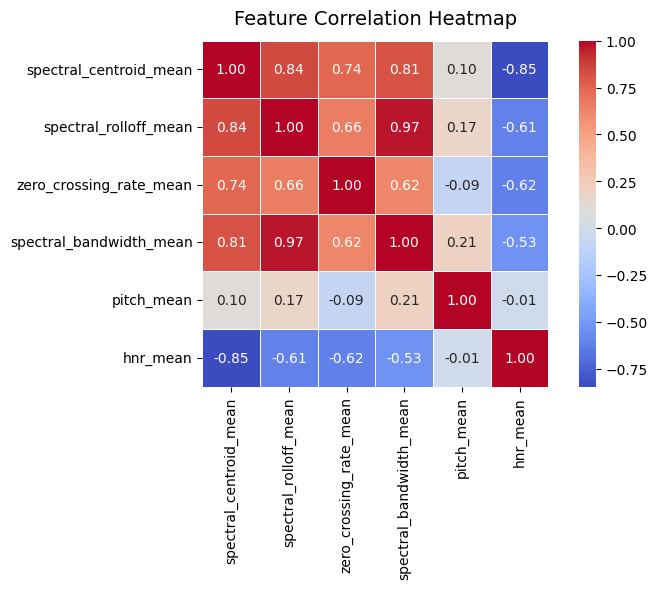

In [ ]:
# --- 1. Check available feature columns ---
print("Available columns:\n", features_df.columns.tolist())

# Safety check
if len(ALL_VALID_FEATURES) == 0:
    raise ValueError("No valid feature columns found in features_df. Check your extraction step!")

# --- 3. Compute Pearson correlation matrix ---
corr_df = features_df[ALL_VALID_FEATURES]
corr = corr_df.corr(method='pearson')

# --- 4. Plot correlation heatmap ---
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title("Feature Correlation Heatmap", fontsize=14, pad=12)
plt.tight_layout()
plt.show()


Logistic Regression: 65.48%
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.40      0.48      1100
           1       0.68      0.82      0.74      1710

    accuracy                           0.65      2810
   macro avg       0.63      0.61      0.61      2810
weighted avg       0.64      0.65      0.64      2810

Confusion Matrix:
 [[ 444  656]
 [ 314 1396]]

KNN (k=5): 81.21%
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76      1100
           1       0.84      0.85      0.85      1710

    accuracy                           0.81      2810
   macro avg       0.80      0.80      0.80      2810
weighted avg       0.81      0.81      0.81      2810

Confusion Matrix:
 [[ 822  278]
 [ 250 1460]]

SVM (RBF Kernel): 81.89%
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.72      0.76      1100

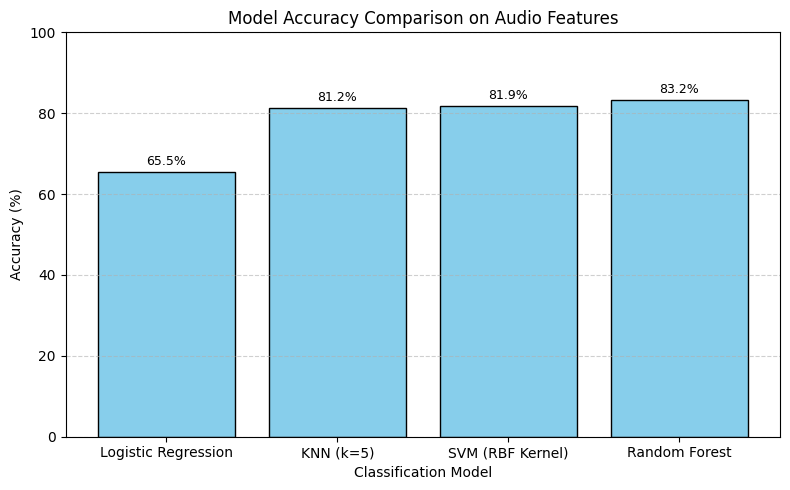

/tmp/ipython-input-928495918.py:116: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


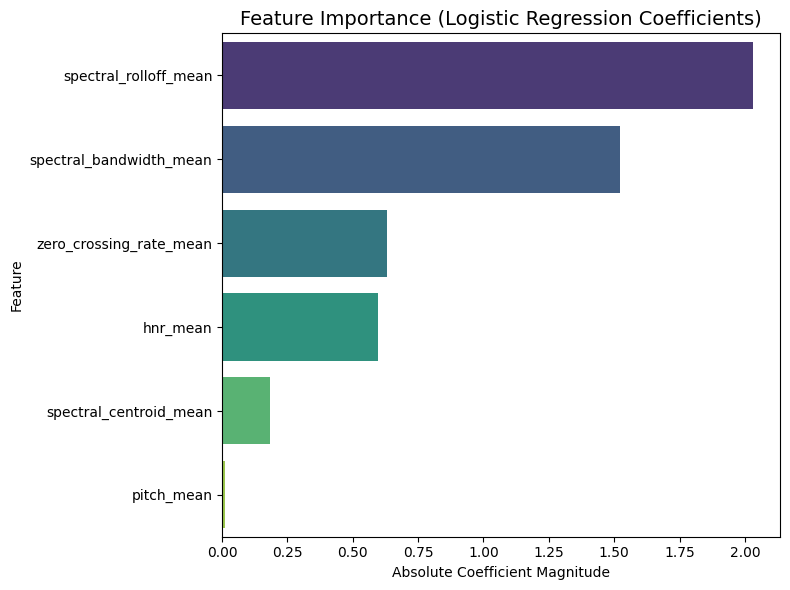

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# =====================================
# 1️⃣ Define Features and Target
# =====================================
# Define *desired* features (some might not exist)
DESIRED_FEATURES = [
    'spectral_centroid_mean',
    'spectral_rolloff_mean',
    'zero_crossing_rate_mean',
    'spectral_bandwidth_mean',
    'pitch_mean',      # ✅ use pitch_mean (exists)
    'hnr_mean'         # ✅ use hnr_mean (exists)
]

# Keep only features that actually exist in your DataFrame
ALL_VALID_FEATURES = [f for f in DESIRED_FEATURES if f in features_df.columns]

if len(ALL_VALID_FEATURES) == 0:
    raise ValueError("No valid feature columns found in features_df! Check extraction output.")

# Drop rows with NaNs only in the selected features
features_df = features_df.dropna(subset=ALL_VALID_FEATURES + ['gender'])

# Extract features (X) and target (y)
X = features_df[ALL_VALID_FEATURES]
y = features_df['gender']  # Assuming values like "male_masculine" / "female_feminine"

# Encode gender into binary values
y = y.map({'male_masculine': 0, 'female_feminine': 1})
if y.isnull().any():
    raise ValueError("Gender column contains unexpected labels. Check your dataset.")

# =====================================
# 2️⃣ Handle Missing Values
# =====================================
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# =====================================
# 3️⃣ Train/Test Split
# =====================================
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.3, random_state=42, stratify=y
)

# =====================================
# 4️⃣ Feature Scaling
# =====================================
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =====================================
# 5️⃣ Define Models
# =====================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5),
    "SVM (RBF Kernel)": SVC(kernel='rbf', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

# =====================================
# 6️⃣ Train and Evaluate Each Model
# =====================================
accuracies = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred) * 100
    accuracies[name] = acc
    print(f"\n{name}: {acc:.2f}%")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# =====================================
# 7️⃣ Plot Model Accuracy Comparison
# =====================================
plt.figure(figsize=(8, 5))
bars = plt.bar(list(accuracies.keys()), list(accuracies.values()), color='skyblue', edgecolor='black')
plt.ylabel("Accuracy (%)")
plt.xlabel("Classification Model")
plt.title("Model Accuracy Comparison on Audio Features")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.6)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{height:.1f}%",
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# =====================================
# 8️⃣ Logistic Regression Feature Importance
# =====================================
log_reg = models["Logistic Regression"]
coef_importance = pd.DataFrame({
    "Feature": ALL_VALID_FEATURES,
    "Coefficient": log_reg.coef_[0]
})
coef_importance["Abs_Coefficient"] = coef_importance["Coefficient"].abs()
coef_importance = coef_importance.sort_values(by="Abs_Coefficient", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=coef_importance,
    x="Abs_Coefficient",
    y="Feature",
    palette="viridis"
)
plt.title("Feature Importance (Logistic Regression Coefficients)", fontsize=14)
plt.xlabel("Absolute Coefficient Magnitude")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
from math import sqrt
from scipy.stats import norm

In [ ]:
from math import sqrt
from scipy.stats import norm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def accuracy_confidence_interval(acc, n, confidence=0.95):
    z = norm.ppf(1 - (1 - confidence) / 2)
    se = sqrt((acc * (1 - acc)) / n)
    lower = acc - z * se
    upper = acc + z * se
    return max(0, lower), min(1, upper)

# Store results
summary_rows = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    ci_low, ci_high = accuracy_confidence_interval(acc, len(y_test))

    # Macro-averaged scores (balanced metric)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    summary_rows.append({
        "Model": name,
        "Accuracy (%)": f"{acc*100:.2f}",
        "95% CI": f"({ci_low*100:.2f}–{ci_high*100:.2f})",
        "Precision": f"{prec:.2f}",
        "Recall": f"{rec:.2f}",
        "F1-Score": f"{f1:.2f}"
    })

# Create summary DataFrame
summary_df = pd.DataFrame(summary_rows)

print("\n📊 Model Performance Summary:\n")
print(summary_df.to_string(index=False))


📊 Model Performance Summary:

              Model Accuracy (%)        95% CI Precision Recall F1-Score
Logistic Regression        65.48 (63.72–67.24)      0.63   0.61     0.61
          KNN (k=5)        81.21 (79.77–82.65)      0.80   0.80     0.80
   SVM (RBF Kernel)        81.89 (80.46–83.31)      0.81   0.80     0.81
      Random Forest        83.17 (81.78–84.55)      0.83   0.81     0.82


In [2]:
!git clone https://github.com/mambabhi/Voice-gender-classification.git

Cloning into 'Voice-gender-classification'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [3]:
!cd Voice-gender-classification && git add audio_gender_classification.ipynb
!cd Voice-gender-classification && git commit -m "Add audio gender classification notebook"
!cd Voice-gender-classification && git push origin main

fatal: pathspec 'audio_gender_classification.ipynb' did not match any files
Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@ea9b44317a9d.(none)')
fatal: could not read Username for 'https://github.com': No such device or address
